In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pdtn_county_map
import numpy as np
import requests
#from bs4 import BeautifulSoup as bs
from IPython.core.display import HTML
import matplotlib.pyplot as plt
#import seaborn as sns
from io import StringIO
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
#import cartopy
#import cartopy.io.shapereader as shapereader
#from cartopy.io import shapereader
%matplotlib inline
# import io
# import scipy.stats as stats
# import statsmodels.api as sm



In [9]:
# display settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Sources: 
https://www.sciencebase.gov/catalog/item/5d55d0a5e4b01d82ce8eafa9
https://www.usgs.gov/natural-hazards/earthquake-hazards/data-tools?page=8
https://earthquake.usgs.gov/hazards/designmaps/
https://earthquake.usgs.gov/scenarios/related/media/M7.7simulation-south.mp4


In [10]:
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=1900-01-01&endtime=2020-10-22&minlatitude=34.9884&maxlatitude=36.6871&minlongitude=-90.3131&maxlongitude=-81.6518'

In [11]:
r = requests.get(url)

In [12]:
usgs = pd.read_csv(StringIO(r.text))
usgs.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-10-21T21:49:45.720Z,36.070500,-89.802333,6.84,2.14,md,46.0,40.0,0.06430,0.10,nm,nm60312762,2020-10-22T12:49:53.160Z,"2 km NNE of Cooter, Missouri",earthquake,0.17,0.49,0.092,31.0,reviewed,nm,nm
1,2020-10-21T20:28:42.930Z,36.525000,-89.569167,6.85,1.69,md,19.0,50.0,0.02596,0.03,nm,nm60312752,2020-10-22T14:45:56.660Z,"3 km E of Marston, Missouri",earthquake,0.34,0.63,0.167,12.0,reviewed,nm,nm
2,2020-10-21T04:55:51.350Z,36.545667,-89.649000,8.01,1.61,md,24.0,44.0,0.02245,0.04,nm,nm60312697,2020-10-21T13:04:57.100Z,"4 km NW of Marston, Missouri",earthquake,0.44,0.40,0.147,21.0,reviewed,nm,nm
3,2020-10-21T03:00:08.800Z,36.313667,-89.536167,9.50,1.23,md,17.0,65.0,0.02693,0.06,nm,nm60312692,2020-10-21T13:18:24.430Z,"7 km NW of Ridgely, Tennessee",earthquake,0.68,0.51,0.032,10.0,reviewed,nm,nm
4,2020-10-20T18:50:21.800Z,36.267500,-89.523333,8.84,2.33,md,46.0,33.0,0.01520,0.11,nm,nm60312672,2020-10-21T12:29:35.220Z,"3 km W of Ridgely, Tennessee",earthquake,0.15,0.30,0.142,34.0,reviewed,nm,nm


In [13]:
# Create a geometry column
usgs['geometry'] = usgs.apply(lambda x: Point((float(x.longitude),
                                            float(x.latitude))),
                              axis = 1)
usgs.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,geometry
0,2020-10-21T21:49:45.720Z,36.070500,-89.802333,6.84,2.14,md,46.0,40.0,0.06430,0.10,nm,nm60312762,2020-10-22T12:49:53.160Z,"2 km NNE of Cooter, Missouri",earthquake,0.17,0.49,0.092,31.0,reviewed,nm,nm,POINT (-89.8023333 36.0705)
1,2020-10-21T20:28:42.930Z,36.525000,-89.569167,6.85,1.69,md,19.0,50.0,0.02596,0.03,nm,nm60312752,2020-10-22T14:45:56.660Z,"3 km E of Marston, Missouri",earthquake,0.34,0.63,0.167,12.0,reviewed,nm,nm,POINT (-89.5691667 36.525)
2,2020-10-21T04:55:51.350Z,36.545667,-89.649000,8.01,1.61,md,24.0,44.0,0.02245,0.04,nm,nm60312697,2020-10-21T13:04:57.100Z,"4 km NW of Marston, Missouri",earthquake,0.44,0.40,0.147,21.0,reviewed,nm,nm,POINT (-89.649 36.5456667)
3,2020-10-21T03:00:08.800Z,36.313667,-89.536167,9.50,1.23,md,17.0,65.0,0.02693,0.06,nm,nm60312692,2020-10-21T13:18:24.430Z,"7 km NW of Ridgely, Tennessee",earthquake,0.68,0.51,0.032,10.0,reviewed,nm,nm,POINT (-89.5361667 36.3136667)
4,2020-10-20T18:50:21.800Z,36.267500,-89.523333,8.84,2.33,md,46.0,33.0,0.01520,0.11,nm,nm60312672,2020-10-21T12:29:35.220Z,"3 km W of Ridgely, Tennessee",earthquake,0.15,0.30,0.142,34.0,reviewed,nm,nm,POINT (-89.5233333 36.2675)


In [ ]:
usgs_tn = usgs[usgs['place'].str.contains('(Tennessee)')]
usgs_tn.info()

In [17]:
tn_shake_map = gpd.read_file('../maps/ProbMMI_VI_100Yrs_VariableVs30.csv')
tn_shake_map.head(15)

,lon,lat,PctProb100yrs,geometry
0,-125.0,50.0,30.27,None
1,-124.9,50.0,29.00,None
2,-124.8,50.0,35.98,None
3,-124.7,50.0,24.64,None
4,-124.6,50.0,27.86,None
5,-124.5,50.0,20.18,None
6,-124.4,50.0,19.34,None
7,-124.3,50.0,18.61,None
8,-124.2,50.0,17.99,None
9,-124.1,50.0,17.48,None


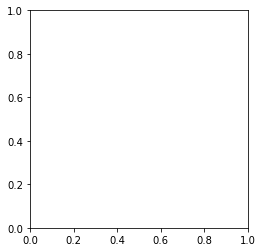

In [15]:
tn_shake_map.plot();

In [4]:
#https://earthquake.usgs.gov/scenarios/related/media/M7.7simulation-south.mp4

In [5]:
# tn_quakes = gpd.read_file('../maps/5d55d0a5e4b01d82ce8eafa9.json')
# tn_quakes.head()


DriverError: '../maps/5d55d0a5e4b01d82ce8eafa9.json' not recognized as a supported file format.